## Домашнее задание 5

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

### __Задача 1__

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания `mu` с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

$$P(t_{\alpha/2}\leq Z\leq t_{1-\alpha/2})=p$$  
$$P(\overline{X}-t_{1-\alpha/2}\frac{\sigma}{\sqrt{n}}\leq\mu\leq \overline{X}-t_{\alpha/2}\frac{\sigma}{\sqrt{n}})=p$$

Где:
* $\overline{X}=80$;
* $\sigma=16$;
* $n=256$;
* $\alpha=0.05$
* $p=0.95$

In [2]:
mean_task1 = 80
sigma_task1 = 16
n_task1 = 256
a_task1 = 1 - 0.95

In [3]:
t1, t2 = stats.norm.ppf(a_task1 / 2), stats.norm.ppf(1 - a_task1 / 2)
t1, t2

(-1.959963984540054, 1.959963984540054)

In [4]:
mean_task1 - t2 * sigma_task1 / np.sqrt(n_task1), mean_task1 - t1 * sigma_task1 / np.sqrt(n_task1)

(78.04003601545995, 81.95996398454005)

### __Задача 2__

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
Известно, что их веса распределены нормально. 
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? 
2. Найдите P-значение для данного теста.

Нулевая гипотеза ($H_0$) - $\mu=200$. Так как дисперсию (и как следствие среднеквартичное отклонение) мы не знаем, воспользуемся $t$-статистикой:

$$t=\frac{\overline{X}-\mu}{\sigma_{X}}\sqrt{n}, \, где$$

In [5]:
samples_task2 = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
n_task2 = samples_task2.shape[0]
mu_task2 = 200
alpha_task2 = 0.01

In [6]:
t_statistics = (samples_task2.mean() - mu_task2) / samples_task2.std(ddof=1) * np.sqrt(n_task2)
t_statistics

-1.0651074037450896

In [7]:
t1, t2 = stats.t.ppf(alpha_task2 / 2, df = n_task2 - 1), stats.t.ppf(1 - alpha_task2 / 2, df = n_task2 - 1)
t1, t2

(-3.24983554401537, 3.2498355440153697)

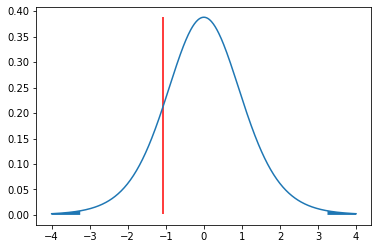

In [8]:
ox = np.linspace(-4, 4, 500)
oy = stats.t.pdf(ox, df=n_task2 - 1)

ox_l = np.linspace(-4, t1, 100)
oy_l = stats.t.pdf(ox_l, df=n_task2 - 1)

ox_r = np.linspace(t2, 4, 100)
oy_r = stats.t.pdf(ox_r, df=n_task2 - 1)

plt.plot(ox, oy)
plt.fill_between(ox_l, oy_l, facecolor='C0')
plt.fill_between(ox_r, oy_r, facecolor='C0')
plt.vlines(t_statistics, oy.min(), oy.max(), color='red')
plt.show()

$t$-статистика находится вне критичной области (_красная черта на графике_), значит нулевая гипотеза верна ($\mu=200$).  
Найдём $P-value$ для данного теста:

In [9]:
p_left = stats.t.cdf(t_statistics, df=n_task2 - 1)
p_right = 1 - stats.t.cdf(t_statistics, df=n_task2 - 1)

pvalue = 2 * min(p_left, p_right)
pvalue

0.31456660352472854

проверим найденное значение:

In [10]:
print('alpha\tresult')
print('-------------')

for alpha in np.linspace(0.2, 0.4, 51):
    t1 = stats.t.ppf(alpha / 2, df=n_task2 - 1)
    t2 = stats.t.ppf(1 - alpha / 2, df=n_task2 - 1)
    
    print(round(alpha, 4), '\t', t1 <= t_statistics <= t2)

alpha	result
-------------
0.2 	 True
0.204 	 True
0.208 	 True
0.212 	 True
0.216 	 True
0.22 	 True
0.224 	 True
0.228 	 True
0.232 	 True
0.236 	 True
0.24 	 True
0.244 	 True
0.248 	 True
0.252 	 True
0.256 	 True
0.26 	 True
0.264 	 True
0.268 	 True
0.272 	 True
0.276 	 True
0.28 	 True
0.284 	 True
0.288 	 True
0.292 	 True
0.296 	 True
0.3 	 True
0.304 	 True
0.308 	 True
0.312 	 True
0.316 	 False
0.32 	 False
0.324 	 False
0.328 	 False
0.332 	 False
0.336 	 False
0.34 	 False
0.344 	 False
0.348 	 False
0.352 	 False
0.356 	 False
0.36 	 False
0.364 	 False
0.368 	 False
0.372 	 False
0.376 	 False
0.38 	 False
0.384 	 False
0.388 	 False
0.392 	 False
0.396 	 False
0.4 	 False


Между значениями 0.312 и 0.316 как раз изменяется результат. Таким образом, $p-value$ найдено верно

### __Задача 3__

Дана выборка диаметров подшипников из примера 1 с занятия 5:
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна `0.0625` при уровне значимости `alpha = 0.05`. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: `H = (n - 1) * sample_variance / variance`, где `n` - число элементов в выборке, `sample_variance` - несмещённая оценка дисперсии, `variance` - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно найти с помощью функции `scipy.stats.chi2.ppf`.

In [25]:
samples_task3 = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
                          1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
                          0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02])
n_task3 = samples_task3.shape[0]
D_task3 = 0.0625
a_task3 = 0.05

In [26]:
H_statistics = (samples_task3.shape[0] - 1) * samples_task3.var(ddof=1) / D_task3

t1 = stats.chi2.ppf(a_task3 / 2, df = n_task3 - 1)
t2 = stats.chi2.ppf(1 - a_task3 / 2, df = n_task3 - 1)
print(H_task3)
print(t1, t2)

28.720541753333343
11.688551922452438 38.0756272503558


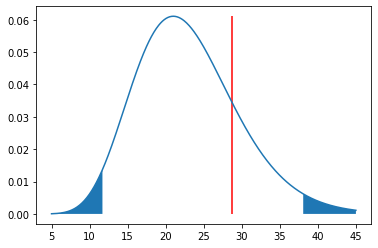

In [28]:
ox = np.linspace(5, 45, 501)
oy = stats.chi2.pdf(ox, df=n_task3 - 1)

ox_l = np.linspace(5, t1, 100)
oy_l = stats.chi2.pdf(ox_l, df=n_task3 - 1)

ox_r = np.linspace(t2, 45, 100)
oy_r = stats.chi2.pdf(ox_r, df=n_task3 - 1)

plt.plot(ox, oy)
plt.fill_between(ox_l, oy_l, facecolor='C0')
plt.fill_between(ox_r, oy_r, facecolor='C0')
plt.vlines(H_statistics, oy.min(), oy.max(), color='red')
plt.show()

Нулевая гипотеза подтверждена.  
дисперсия случайной величины равна `0.0625`

### Задача 4 (Была показана на вебинаре как _задача 3_, но в файле нет)
Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

Нулевая гипотеза ($H_0$) - $\mu=17$. Так как дисперсию мы знаем, воспользуемся $Z$-статистикой:

$$Z=\frac{\overline{X}-\mu}{\sigma}\sqrt{n}$$

In [30]:
mu_task4 = 17
a_task4 = 0.025
n_task4 = 100
mean_task4 = 17.5
D_task4 = 4

In [33]:
Z_statistics = (mean_task4 - mu_task4) / np.sqrt(D_task4) * np.sqrt(n_task4)

t = stats.t.ppf(1 - a_task4, df=n_task4 - 1)
Z_statistics, t

(2.5, 1.9842169515086827)

$Z-статистика$ входит в критическую область. Таким образом нулевая гипотеза не подтвердилась. Средний диаметр шариков для подшипников больше 17 мм.